# Homework 11: Regression Inference

**Reading**: 

* [Inference for Regression](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Regression Inference for the NFL Draft

In this homework, we will be analyzing the relationship between draft position and success in the NFL. The NFL draft is an annual event in which every NFL team takes turns choosing players that they will add to their team. There are around 200 selections, called "picks" made every year, although this number has changed over the years.

The `nfl` table has five columns, the name of the `Player`, the `Salary` that player made for the 2019 season, the year that player was drafted (`Year Drafted`), the number of the draft pick that was used when the player was drafted (`Pick Number`), and the `Position` in football that player plays.

Each row in `nfl` corresponds to one player who played in the **2019 season**.

In [2]:
# Just run this cell!
nfl = Table.read_table("nfl.csv")
nfl.show(5)

Player,Salary,Year Drafted,Pick Number,Position
Baker Mayfield,570000,2018,1,QB
Cam Newton,16200000,2011,1,QB
Eli Manning,11500000,2004,1,QB
Eric Fisher,10350000,2013,1,OT
Jadeveon Clowney,15967200,2014,1,DE


#### Question 1

Add a column to the table called `Career Length` that corresponds to how long a player has been in the NFL to the `nfl` table. `Career Length` is from when they were drafted to the year that the data was collected, 2019. So, if a player was drafted in 2015, their career length is 4:
$$2019-2015=4$$

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [3]:
nfl = nfl.with_column('Career Length', 2019 - nfl.column('Year Drafted'))
nfl.show(5)

Player,Salary,Year Drafted,Pick Number,Position,Career Length
Baker Mayfield,570000,2018,1,QB,1
Cam Newton,16200000,2011,1,QB,8
Eli Manning,11500000,2004,1,QB,15
Eric Fisher,10350000,2013,1,OT,6
Jadeveon Clowney,15967200,2014,1,DE,5


As usual, let's investigate our data visually before analyzing it numerically. The first relationship we will analyze is the relationship between a player's `Pick Number` and their `Career Length`. Run the following cell to see a scatter diagram with the line of best fit already plotted for you.

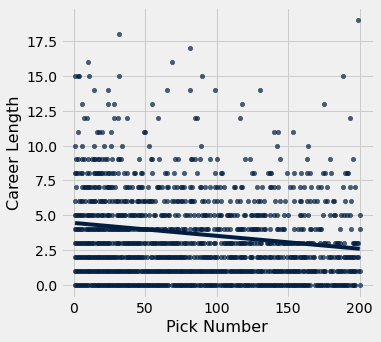

In [4]:
# Just run this cell
nfl.scatter("Pick Number", "Career Length", fit_line=True)

#### Question 2

Use the functions given to assign the correlation between `Pick Number` and `Career Length` to `pick_length_correlation`. `correlation` takes in three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [5]:
def standard_units(arr):
    return (arr- np.mean(arr)) / np.std(arr)

def correlation(tbl, col1, col2):
    r = np.mean(standard_units(tbl.column(col1)) * standard_units(tbl.column(col2)))
    return r

pick_length_correlation = correlation(nfl, 'Pick Number', 'Career Length')
pick_length_correlation

-0.16517332737646848

We can see that there is a negative association between `Pick Number` and `Career Length`! If in the sample, we found a linear relation between the two variables, would the same be true for the population? Would it be exactly the same linear relation? Could we predict the response of a new individual who is not in our sample?

#### Question 3

Kentaro thinks that the slope of the true line of best fit for `Pick Number` and `Career Length` is not zero: that is, there is some correlation/association between `Pick Number` and `Career Length`. To test this claim, we can run a hypothesis test! Define the null and alternative hypothesis for this test.

<!--
BEGIN QUESTION
name: q1_3
manual: true
-->
<!-- EXPORT TO PDF -->

*The null hypothesis is that the slope of the line of best fit for `Pick Number` and `Career Length` is zero. The alternative hypothesis is that the slope of the line is not zero.*

#### Question 4

Ben says that instead of finding the slope for each resample, we can find the correlation instead, and that we will get the same result. Why is he correct? What is the relationship between slope and correlation?

<!--
BEGIN QUESTION
name: q1_4
manual: true
-->
<!-- EXPORT TO PDF -->

*Ben is correct because the correlation is equal to the slope of the data in standard units. Finding the correlation will give us that slope and will be the same result.*

#### Question 5
Define the function `one_resample_r` that performs a bootstrap and finds the correlation between `Pick Number` and `Career Length` in the resample. `one_resample_r` should take three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.

<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [26]:
def one_resample_r(tbl, col1, col2):
    shuffled = tbl.sample()
    return correlation(shuffled, col1, col2)

# Don't change this line below!
one_resample = one_resample_r(nfl, "Pick Number", "Career Length")
one_resample

-0.14472185664462694

#### Question 6

Generate 1000 bootstrapped correlations for `Pick Number` and `Career Length`, store your results in the array `resampled_correlations_pc`, and plot a histogram of your results.

<!--
BEGIN QUESTION
name: q1_6
manual: true
-->
<!-- EXPORT TO PDF -->

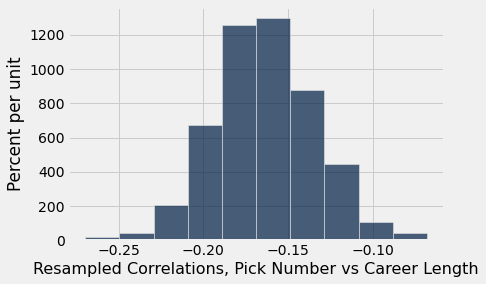

In [30]:
resampled_correlations_pc = make_array()
for i in np.arange(1000):
    resampled_correlations_pc = np.append(resampled_correlations_pc, one_resample_r(nfl, 'Pick Number', 'Career Length'))
Table().with_column("Resampled Correlations, Pick Number vs Career Length", resampled_correlations_pc).hist()

#### Question 7

Calculate a 99% confidence interval for the resampled correlations and assign either `True` or `False` to `reject` if we can reject the null hypothesis or if we cannot reject the null hypothesis using a 1% p-value cutoff.

<!--
BEGIN QUESTION
name: q1_7
manual: false
-->

In [20]:
lower_bound_pc = percentile(0.5, resampled_correlations_pc)
upper_bound_pc = percentile(99.5, resampled_correlations_pc)
reject = True

# Don't change this!
print(f"99% CI: [{lower_bound_pc}, {upper_bound_pc}] , Reject the null: {reject}")

99% CI: [-0.24609110911102502, -0.09367506987402816] , Reject the null: True


Now let's investigate the relationship between `Pick Number` and `Salary`. As usual, let's inspect our data visually first. A line of best fit is plotted for you.

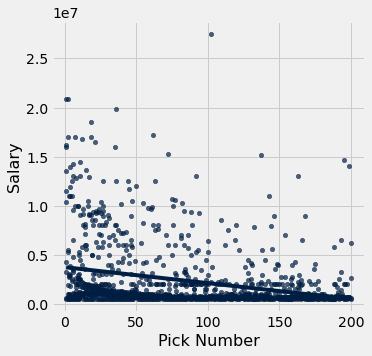

In [21]:
# Just run this cell!
nfl.scatter("Pick Number", "Salary", fit_line=True)

#### Question 8

Using the function `correlation`, find the correlation between `Pick Number` and `Salary` and assign it to `pick_salary_correlation`.


<!--
BEGIN QUESTION
name: q1_8
manual: false
-->

In [27]:
pick_salary_correlation = correlation(nfl, 'Pick Number', 'Salary')
pick_salary_correlation

-0.2812388644684761

We can see that there is a negative association between `Pick Number` and `Salary`! 

#### Question 9

Once again, Kentaro thinks that the slope of the true line of best fit for `Pick Number` and `Salary` is not zero: that is, there is some correlation/association between `Pick Number` and `Salary`. To test this claim, we can run a hypothesis test! Define the null and alternative hypothesis for this test.


<!--
BEGIN QUESTION
name: q1_9
manual: true
-->
<!-- EXPORT TO PDF -->

*The null hypothesis is that the slope of the line of best fit for `Pick Number` and `Salary` is zero. The alternative hypothesis is that the slope of the line is not zero.*

#### Question 10

Generate 1000 bootstrapped correlations for `Pick Number` and `Salary`, append them to the array `resampled_correlations_salary`, and then plot a histogram of your results.

<!--
BEGIN QUESTION
name: q1_10
manual: true
-->
<!-- EXPORT TO PDF -->

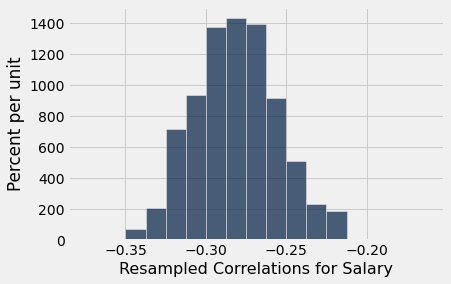

In [31]:
resampled_correlations_salary = make_array()
for i in np.arange(1000):
    resampled_correlations_salary = np.append(resampled_correlations_salary, one_resample_r(nfl, 'Pick Number', 'Salary'))
Table().with_column("Resampled Correlations for Salary", resampled_correlations_salary).hist(bins=np.arange(-.375, -.15, 0.0125))

#### Question 11

Calculate a 99% confidence interval for the resampled correlations and assign either `True` or `False` to `reject_sal` if we can reject the null hypothesis or if we cannot reject the null hypothesis using a 1% p-value cutoff.


<!--
BEGIN QUESTION
name: q1_11
manual: false
-->

In [32]:
lower_bound_sal = percentile(0.5, resampled_correlations_salary)
upper_bound_sal = percentile(99.5, resampled_correlations_salary)
reject_sal = True

# Don't change this!
print(f"99% CI: [{lower_bound_sal}, {upper_bound_sal}], Reject the null: {reject_sal}")

99% CI: [-0.34363017461772616, -0.2159365686099212], Reject the null: True


## Analyzing Residuals

Next, Kentaro wants to predict his Career Length and Salary based on his Pick Number. To understand what his Career Length and Salary might be, Kentaro wants to generate confidence intervals of possible values for both career length and salary. First, let's investigate how effective our predictions for career length and salary based on pick number are.

#### Question 12

Calculate the slope and intercept for the line of best fit for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`. Assign these values to `career_length_slope`, `career_length_intercept`, `salary_slope`, and `salary_intercept` respectively. The function `parameters` returns a two-item array containing the slope and intercept of a linear regression line.

*Hint 1: Use the `parameters` function with the arguments specified!*

*Hint 2: Remember we're predicting career length and salary **based off** a pick number. That should tell you what the `colx` and `coly` arguments you should specify when calling `parameters`.*

<!--
BEGIN QUESTION
name: q1_12
manual: false
-->

In [33]:
# DON'T EDIT THE PARAMETERS FUNCTION
def parameters(tbl, colx, coly):
    x = tbl.column(colx)
    y = tbl.column(coly)
    
    r = correlation(tbl, colx, coly)
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_sd = np.std(x)
    y_sd = np.std(y)
    
    slope = (y_sd / x_sd) * r
    intercept = y_mean - (slope * x_mean)
    return make_array(slope, intercept)

career_length_slope = parameters(nfl, 'Pick Number', 'Career Length').item(0)
career_length_intercept = parameters(nfl, 'Pick Number', 'Career Length').item(1)

salary_slope = parameters(nfl, 'Pick Number', 'Salary').item(0)
salary_intercept = parameters(nfl, 'Pick Number', 'Salary').item(1)

#### Question 13

Draw a scatter plot of the residuals for each line of best fit for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`.

*Hint: We want to get the predictions for every player in the dataset*

*Hint 2: This question is really involved, try to follow the skeleton code!*

<!--
BEGIN QUESTION
name: q1_13
manual: true
-->
<!-- EXPORT TO PDF -->

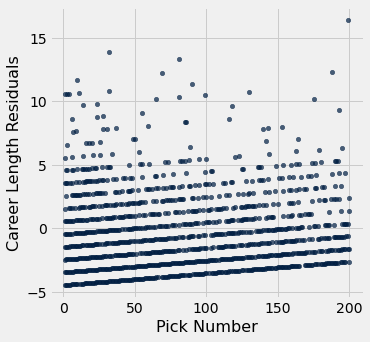

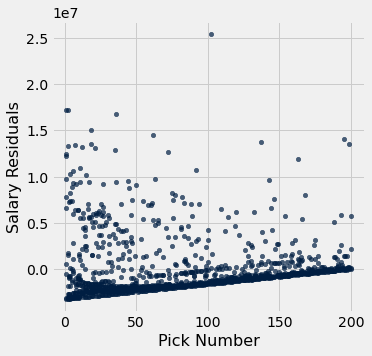

In [34]:
predicted_career_lengths = (career_length_slope * nfl.column('Pick Number')) + career_length_intercept
predicted_salaries = (salary_slope * nfl.column('Pick Number')) + salary_intercept


career_length_residuals = nfl.column('Career Length') - predicted_career_lengths
salary_residuals = nfl.column('Salary') - predicted_salaries

nfl_with_residuals = nfl.with_columns("Career Length Residuals", career_length_residuals, "Salary Residuals", salary_residuals)

# Now generate two scatter plots!
nfl_with_residuals.scatter("Pick Number", "Career Length Residuals")
nfl_with_residuals.scatter("Pick Number", "Salary Residuals")

Here's a [link](https://www.inferentialthinking.com/chapters/15/6/Numerical_Diagnostics.html) to properties of residuals in the textbook that could help out with some questions.

#### Question 14

Based on these plots of residuals, do you think linear regression is a good model for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`? Explain for both.

<!--
BEGIN QUESTION
name: q1_14
manual: true
-->
<!-- EXPORT TO PDF -->

*For a linear regression to be a good model, the residuals should be randomly scattered around y = 0. This does not appear to be the case in either of the above plots, indicating that linear regression is not a good model for either relationship.*

#### Question 15

Assign `career_length_residual_corr` and `salary_residual_corr` to either 1, 2 or 3 corresponding to whether or not the correlation between `Pick Number` and `Career Length Residuals` is positive, approximately zero, or negative, and to whether or not the correlation between `Pick Number` and `Salary Residuals` is positive, approximately zero, or negative respectively.

1. Positive
2. Approximately Zero
3. Negative

<!--
BEGIN QUESTION
name: q1_15
manual: false
-->

In [37]:
career_length_residual_corr = 2
salary_residual_corr = 2

It looks like the largest residuals are positive residuals, so let's investigate those more closely.

#### Question 16

Let's investigate where our regression line is making errors. Using the `nfl_with_residuals` table, assign `greatest_career_length_residual` to the string that is the name of the player with the largest positive residual for `Pick Number` vs `Career Length`.


<!--
BEGIN QUESTION
name: q1_16
manual: false
-->

In [39]:
greatest_career_length_residual = nfl_with_residuals.sort('Career Length Residuals', descending = True).column('Player').item(0)
greatest_career_length_residual

'Tom Brady'

Now let's investigate the residuals for salary. Run the cell below to see the players with the largest residuals for `Pick Number` vs `Salary`.

In [40]:
# Just run this cell!
nfl_with_residuals.sort("Salary Residuals", descending=True).take(np.arange(10)).drop(2,6)

Player,Salary,Pick Number,Position,Career Length,Salary Residuals
Kirk Cousins,27500000,102,QB,7,2.54226e+07
Marcus Mariota,20922000,2,QB,4,1.72216e+07
Jameis Winston,20922000,1,QB,4,1.72054e+07
Derek Carr,19900000,36,QB,5,1.67514e+07
Joe Flacco,18500000,18,QB,11,1.50593e+07
Jimmy Garoppolo,17200000,62,QB,5,1.44734e+07
Antonio Brown,14625000,195,WR,9,1.4057e+07
Grady Jarrett,15209000,137,DT,4,1.36996e+07
Melvin Ingram,17000000,18,DE,7,1.35593e+07
Tom Brady,14000000,199,QB,19,1.34969e+07


#### Question 17

What patterns do you notice with these large residuals for salary? How could this affect our analysis?


<!--
BEGIN QUESTION
name: q1_17
manual: true
-->
<!-- EXPORT TO PDF -->

*The salary residuals are higher for larger salaries. This indicates that the model is not good at predicting salaries when the observed salaries are large.*

## Prediction Intervals

Now, Kentaro wants to predict his career length based on his specific pick number, which is 42. Instead of using the best fit line generated from the sample, Kentaro wants to generate an interval for his predicted career length.

#### Question 18

Define the function `one_resample_prediction` that generates a bootstrapped sample from the `tbl` argument, calculates the line of best fit for `ycol` vs `xcol` for that resample, and predicts a value based on `xvalue`.

*Hint: Remember you defined the `parameters` function earlier*


<!--
BEGIN QUESTION
name: q1_18
manual: false
-->

In [47]:
def one_resample_prediction(tbl, colx, coly, xvalue):
    shuffled = tbl.sample()
    slope = parameters(shuffled, colx, coly).item(0)
    intercept = parameters(shuffled, colx, coly).item(1)
    return (slope * xvalue) + intercept

kentaros_career_length_pred = one_resample_prediction(nfl, 'Pick Number', 'Career Length', 42)
kentaros_career_length_pred

4.128771392911074

#### Question 19

Assign `resampled_predictions` to be an array that will contain 1000 resampled predictions for Kentaro's career length based on his pick number, and then generate a histogram of it.


<!--
BEGIN QUESTION
name: q1_19
manual: true
-->
<!-- EXPORT TO PDF -->

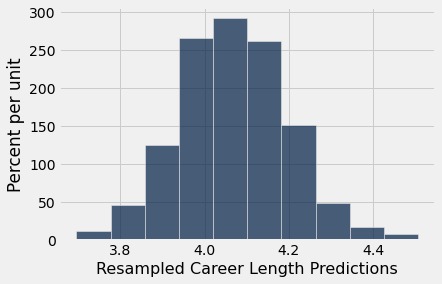

In [48]:
resampled_predictions = make_array()

for i in np.arange(1000):
    resampled_predictions = np.append(resampled_predictions, one_resample_prediction(nfl, 'Pick Number', 'Career Length', 42))

# Don't change/delete the code below in this cell
Table().with_column("Resampled Career Length Predictions", resampled_predictions).hist()

#### Question 20

Using `resampled_predictions` from Question 19, generate a 90% confidence interval for Kentaro's predicted career lengths.


<!--
BEGIN QUESTION
name: q1_20
manual: false
-->

In [49]:
lower_bound_kentaro = percentile(5, resampled_predictions)
upper_bound_kentaro = percentile(95, resampled_predictions)

# Don't delete/modify the code below in this cell
print(f"90% CI: [{lower_bound_kentaro}, {upper_bound_kentaro}]")

90% CI: [3.8591834439144987, 4.271122718355999]


Run the following cell to see a few bootstrapped regression lines, and the predictions they make for a career length from a pick number of 42.

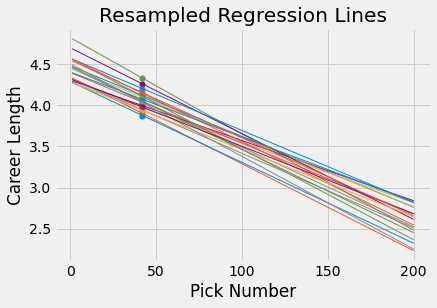

In [50]:
# Just run this cell! 
# You don't need to understand all of what it is doing but you should recognize a lot of the code!
lines = Table(['slope','intercept'])
x=42
for i in np.arange(20):
    resamp = nfl.sample(with_replacement=True)
    resample_pars = parameters(resamp, "Pick Number", "Career Length") 
    slope = resample_pars.item(0)
    intercept = resample_pars.item(1)
    lines.append([slope, intercept])
    
lines['prediction at x='+str(x)] = lines.column('slope')*x + lines.column('intercept')
xlims = [min(nfl.column("Pick Number")), max(nfl.column("Pick Number"))]
left = xlims[0]*lines[0] + lines[1]
right = xlims[1]*lines[0] + lines[1]
fit_x = x*lines['slope'] + lines['intercept']
for i in range(20):
    plt.plot(xlims, np.array([left[i], right[i]]), lw=1)
    plt.scatter(x, fit_x[i], s=30)
plt.ylabel("Career Length");
plt.xlabel("Pick Number");
plt.title("Resampled Regression Lines");

#### Question 21

What are some biases in this dataset that may have affected our analysis? Some questions you can ask yourself are: "is our sample a simple random sample?" or "what kind of data are we using/what variables are we dealing with: are they categorical, numerical, or both (both is something like ordinal data)?".

*Hint: you might want to revisit the beginning of this assignment to reread how this data/`nfl` table was generated.*


<!--
BEGIN QUESTION
name: q1_22
manual: true
-->
<!-- EXPORT TO PDF -->

*This dataset has several biases. Firstly, it is only the NFL draft from 2019, meaning that this model could only be used to predict salaries and career lengths from this draft. Secondly, there are likely other variables that are contributing to each players pick number and salary. Lastly, this dataset could never be used outside of the NFL, as the data was strictly taken from it.*